In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
housing = fetch_california_housing(as_frame=True)
data = housing.frame
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
def build_ann(hidden_layers=1, neurons=64, learning_rate=0.001):
    model = Sequential()

    model.add(Dense(
        neurons,
        activation="relu",
        input_shape=(X_train_scaled.shape[1],)
    ))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation="relu"))

    model.add(Dense(1, activation="linear"))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse"
    )

    return model


In [7]:
model = build_ann()

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.6372 - val_loss: 0.6082
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5241 - val_loss: 0.4706
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4395 - val_loss: 0.4341
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3963 - val_loss: 0.4149
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3768 - val_loss: 0.4162
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3897 - val_loss: 0.4146
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3784 - val_loss: 0.3940
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3514 - val_loss: 0.3974
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3629 - val_loss: 0.3830
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3618 - val_loss: 0.3836
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3534 - val_loss: 0.3764
Epoch 12/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [8]:
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)

print("Test MSE:", mse)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Test MSE: 0.4544150922862715


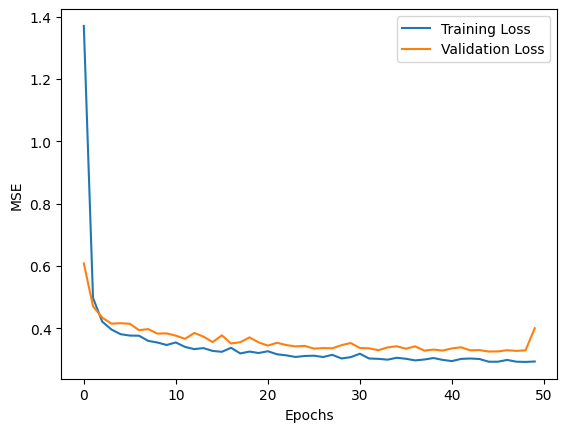

In [9]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


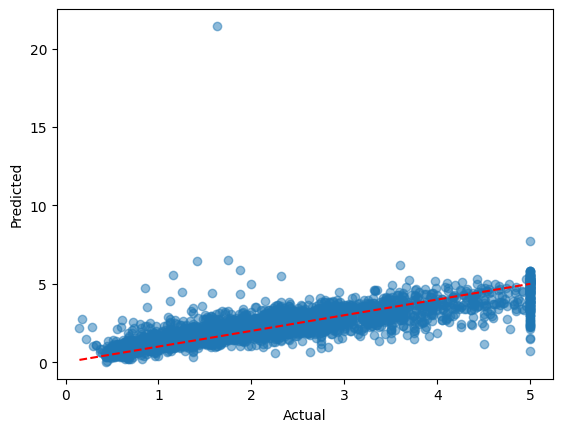

In [10]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [11]:
layer_results = {}

layers_list = [1, 2, 4]

for layers in layers_list:
    model = build_ann(hidden_layers=layers)

    model.fit(
        X_train_scaled,
        y_train,
        epochs=50,
        verbose=0
    )

    preds = model.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, preds)

    layer_results[layers] = mse

layer_results


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


{1: 0.3114257569155411, 2: 0.26934170663824947, 4: 0.261660431203809}

In [12]:
neuron_results = {}

neurons_list = [16, 64, 128]

for neurons in neurons_list:
    model = build_ann(neurons=neurons)

    model.fit(
        X_train_scaled,
        y_train,
        epochs=50,
        verbose=0
    )

    preds = model.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, preds)

    neuron_results[neurons] = mse

neuron_results


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


{16: 0.33770770871511885, 64: 0.3339263369887815, 128: 0.305218786801029}

In [13]:
lr_results = {}

learning_rates = [0.01, 0.001, 0.0001]

for lr in learning_rates:
    model = build_ann(learning_rate=lr)

    model.fit(
        X_train_scaled,
        y_train,
        epochs=50,
        verbose=0
    )

    preds = model.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, preds)

    lr_results[lr] = mse

lr_results


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


{0.01: 0.3072127311320347,
 0.001: 0.30652951810413975,
 0.0001: 0.37403479654975147}

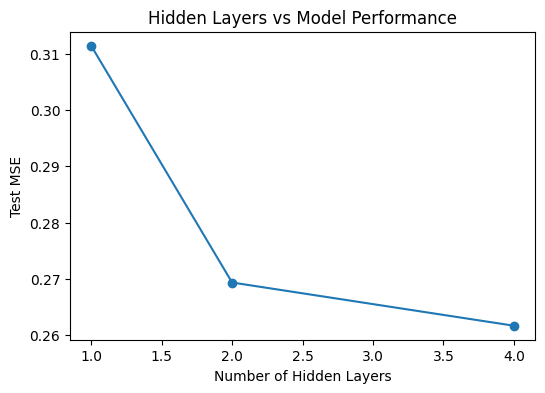

In [14]:
plt.figure(figsize=(6,4))
plt.plot(
    list(layer_results.keys()),
    list(layer_results.values()),
    marker='o'
)

plt.xlabel("Number of Hidden Layers")
plt.ylabel("Test MSE")
plt.title("Hidden Layers vs Model Performance")
plt.show()


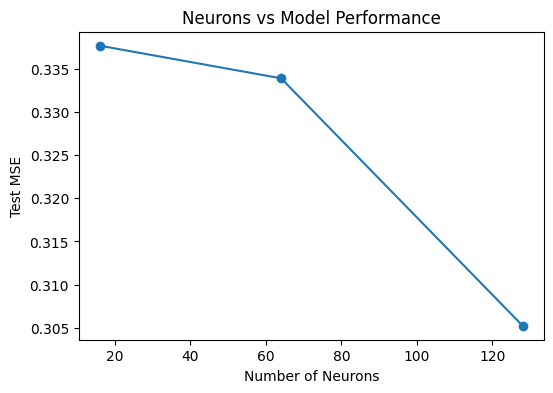

In [15]:
plt.figure(figsize=(6,4))
plt.plot(
    list(neuron_results.keys()),
    list(neuron_results.values()),
    marker='o'
)

plt.xlabel("Number of Neurons")
plt.ylabel("Test MSE")
plt.title("Neurons vs Model Performance")
plt.show()


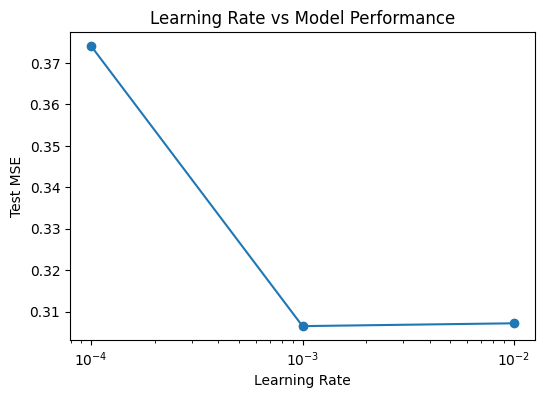

In [16]:
plt.figure(figsize=(6,4))
plt.plot(
    list(lr_results.keys()),
    list(lr_results.values()),
    marker='o'
)

plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Test MSE")
plt.title("Learning Rate vs Model Performance")
plt.show()
